In [3]:
from jeffutils.utils import reimport
from pprint import pprint

from data_loader import *
reimport(["from data_loader import *"], globals())

date_time = dt.datetime.now().strftime(date_format)

Testing 2 models ['randomforest', 'knn'] on
2 datasets ['digits', 'cancer'] at 241025@1254
Testing randomforest on digits
	X shape:  (1437, 64)
	y shape:  (1437,)


Benchmarking randomforest: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


Testing knn on digits
	X shape:  (1437, 64)
	y shape:  (1437,)


Benchmarking knn: 100%|██████████| 10/10 [00:00<00:00, 81.31it/s]


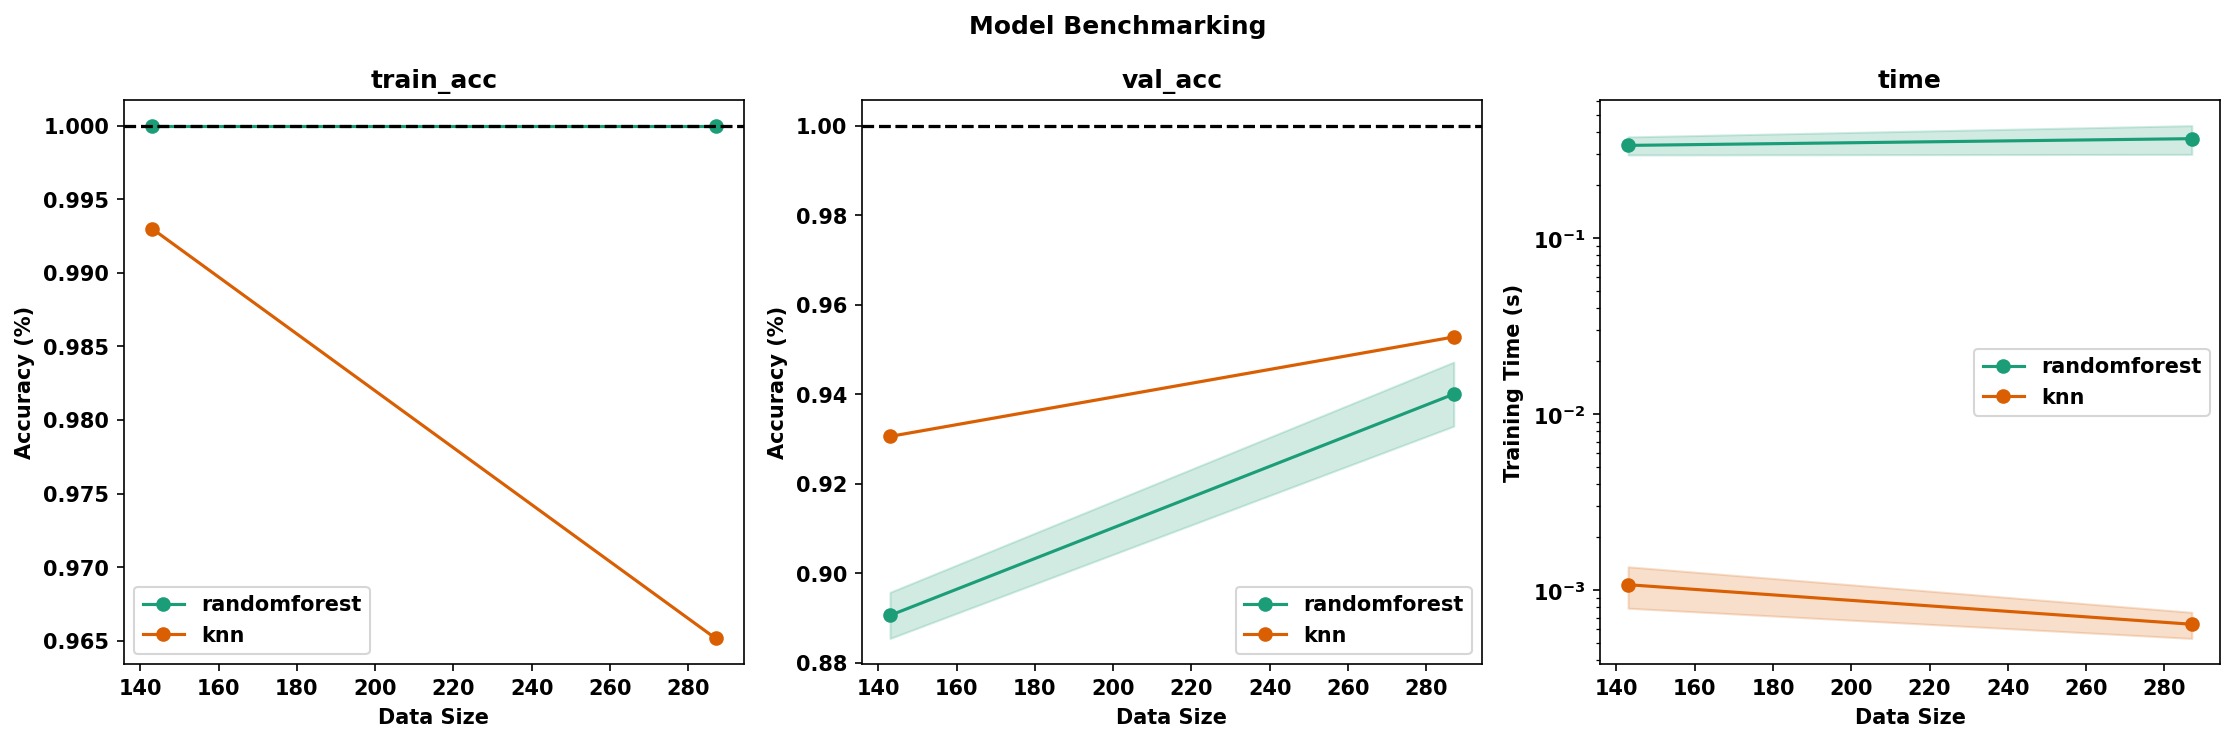

Testing randomforest on cancer
	X shape:  (455, 30)
	y shape:  (455,)


Benchmarking randomforest: 100%|██████████| 10/10 [00:04<00:00,  2.33it/s]


Testing knn on cancer
	X shape:  (455, 30)
	y shape:  (455,)


Benchmarking knn: 100%|██████████| 10/10 [00:00<00:00, 113.64it/s]


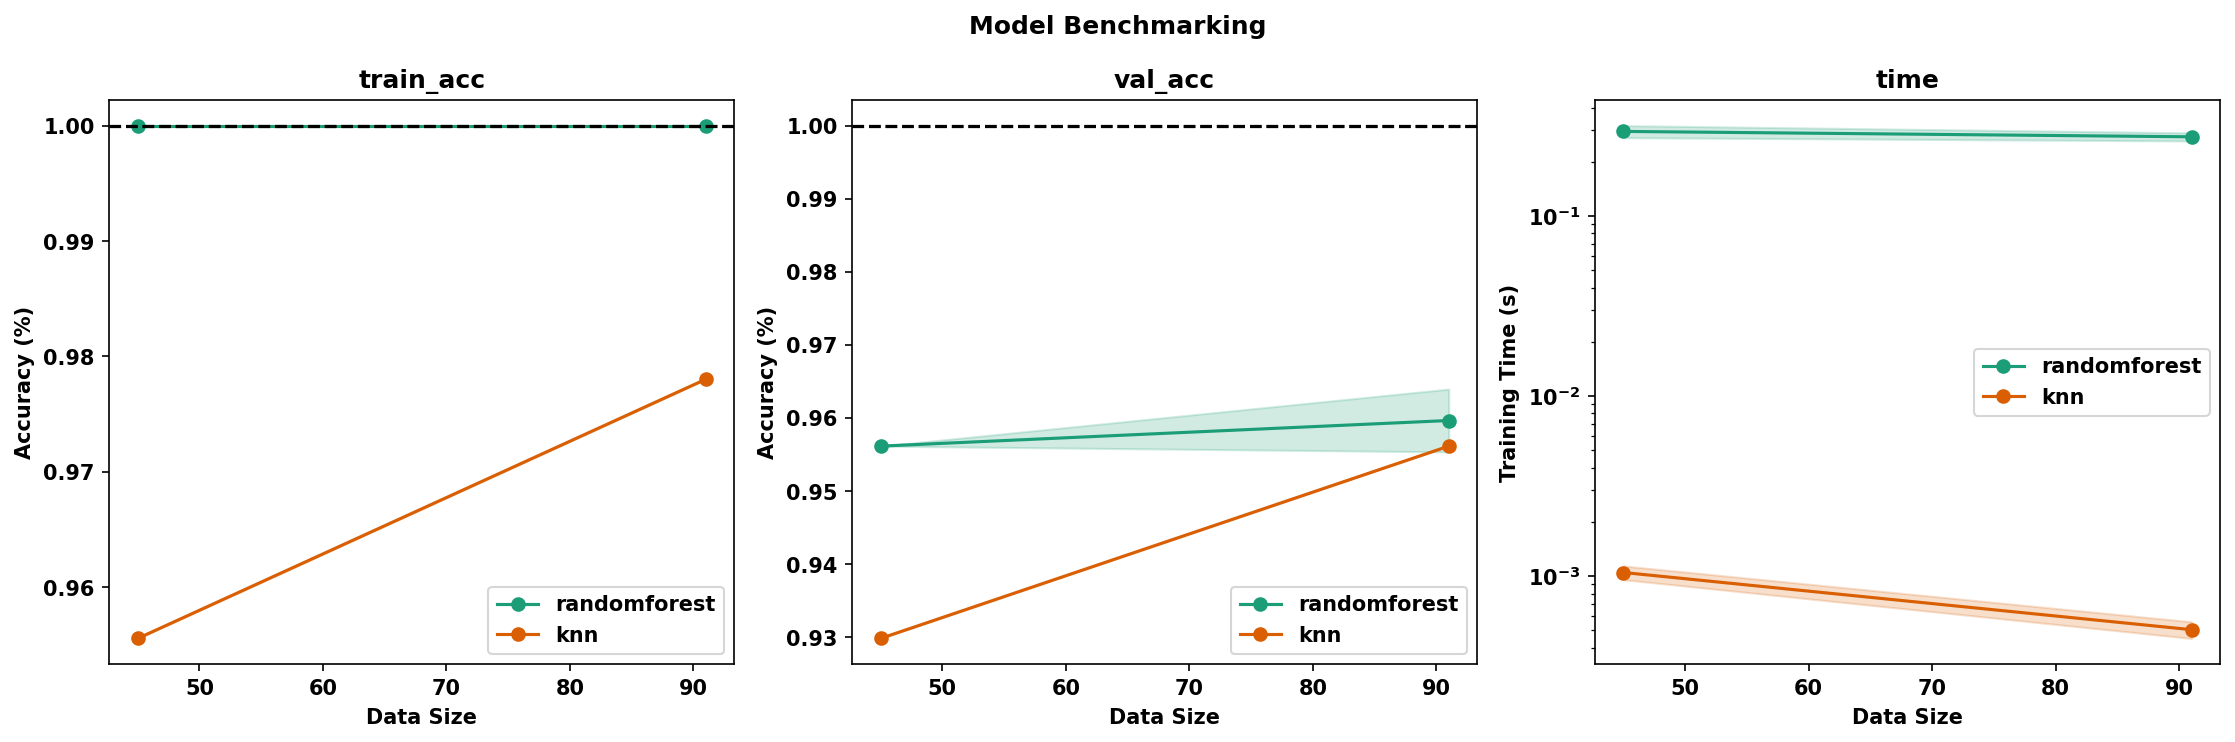

In [5]:
test_results = {}
verbose = 1
new_set = False

if new_set:
    date_time = dt.datetime.now().strftime(date_format)

if verbose > 0:
    print(f"{len(all_benchmark_models)} models \t{all_benchmark_models} on")
    print(f"{len(benchmark_datasets)} datasets \t{benchmark_datasets} at {date_time}\n")
if verbose > 1:
    pprint(config)

for dataset_name in benchmark_datasets:
    test_results[dataset_name] = {}
    for model_name in all_benchmark_models:
        results, sizes = test_model(model_name, date_time, dataset_name, return_sizes=True, verbose=verbose)
        test_results[dataset_name].update(results)
    constants = (sizes, date_time, dataset_name)
    plot_results(test_results[dataset_name], constants, 
                 save_fig=True, replace_fig=True, from_data=False)